# Task 1
- 3 regression models

### 1) Linear Regression
- no_of_Mosquito = function(weather_features^A)

### 2) Linear Regression
- no_of_Mosquito_female = function(weather_features^B)
- OR no_of_Mosquito_male = function(weather_features^C)
- Preferably do both

### 3) Polynomial Regression
- no_of_Mosquito_female = function(weather_features^B)
- OR no_of_Mosquito_male = function(weather_features^C)
- Preferably do both

NOTE: A, B, C are a note that a subset of the inputs is used.
Use different cost functions, perform analysis of constructed models, apply normalization and standardization, feature selection

## Dataset

- You need to combine both data sets to prepare a data set suitable for model construction.
- Both data sets have different ‘time grid’ so you need to resolve it.
- You have to aggregate data points over time, and different mosquito species.

### Mosquito data notes:
From website: Capture results of mosquitoes from various locations in Edmonton. These collections are from standard New Jersey light traps that are commonly used to record changes in abundance of mosquitoes before and after control campaigns and to compare seasonal and annual fluctuations in population. Since not all mosquito species are attracted equally to light traps, the City uses a variety of other trapping and survey methods (with their own limitations) to monitor mosquitoes. Not all trap collection sites are factored into the historical averages. Some data can be incomplete due to trap failure. Some trap locations change over time. Trap collections reflect, not absolute population levels, but mosquito activity, which is influenced by changing environmental conditions (temperature, humidity, wind, etc.). The weekly averages do not include any male mosquitoes or any females of species that do not typically bite people. Each data set reflects the mosquito activity of the week previous to the collection date.

To complement this dataset, there is the Rainfall Gauge data which measures rainfall data in the Greater Edmonton area.


- Data collected from May 1990 onward
- Data is updated weekly and collected automatically

#### Columns:

- Trap Date (Date & Time Floating timestamp): date when the mosquito traps are collected. An empty mosquito traps are replaced for the next collection at the same time.
- Genus (Text): When biologists talk about a genus, they mean one or more species of animals or plants that are closely related to each other. Low-level taxonomic ranking for biological classification.
- Specific Epithet (Text): lowest taxonomic rank and having common characteristics and (usually) capable of mating with one another.
- Gender (Text): male or female
- IDd (Text or NaN): specimens too damaged for precise identification or not sigificant in the mosquito program are marked with a value of UnID.
- Count (Number/Int): number of mosquitoes trapped at this Trap Region on this Trap Date.
- Trap Region (Text): The description of where the mosquito trap was placed.
- Include (Text or NaN): blank or no.
- Comparison Group (Text): Trap areas used to evaluate mosquito program efficacy.
- Latitude (Number/Float): geographic coordinate that specifies north-south position of mosquito trap.
- Longitude (Number/Float): The geographic coordinate that specifies the east–west position of the mosquito trap.
- Location (Point): The combination of latitude/longitude for mapping purposes.

## Edmoton weather notes:
- Source: weatherstats.ca based on Environment and Climate Change Canada data

### Columns (personal notes):
- date_time_local (Date/Time human format YYYY-MM-DD HH:MM:SS TZ): date and time data recorded.
- unixtime: unix time format
- pressure_station (float or NaN):
- pressure_sea (float or NaN):
- wind_dir (Text or NaN): wind direction in compass directions (SW, WSW ... etc)
- wind_dir_10s (float or NaN): 
- wind_speed (float or NaN): speed of the wind in CONVUNIT <- TBD
- wind_gust (NaN or float): 
- relative_humidty (float or NaN):
- dew_point (float or NaN): 
- temperature (float or NaN): temp recorded
- windchill (float or NaN):
- humidex (float or NaN):
- visibility (float or NaN):
- health_index (float or NaN):
- cloud_cover_4 (float or NaN):
- cloud_cover_8 (float or NaN):
- cloud_cover_10 (float or NaN):
- solar_radiation (float or NaN):


## Imports

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white bg for sns plots
sns.set(style="whitegrid", color_codes=True)

from datetime import timedelta


import warnings
warnings.simplefilter(action='ignore')

## Read csv files

In [101]:
mos_data = pd.read_csv("./data/mosquito_data.csv")
weather_data = pd.read_csv("./data/weather_data.csv")


orig_mos_data = mos_data.copy()
orig_weather_data = weather_data.copy()

In [102]:
mos_data.head()

,trap_date,genus,specific_epithet,gender,idd,count,trap_region,include,comparison_group,latitude,longitude,geocoded_column
0,2015-09-15T00:00:00.000,Aedes,vexans,Female,NaN,3,Rural-West,NaN,Outer,53.562973,-113.787353,POINT (-113.787353 53.5629733)
1,1998-05-12T00:00:00.000,Male,UnID,Male,UnID,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
2,2001-08-28T00:00:00.000,Culex,tarsalis,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
3,2004-08-17T00:00:00.000,Culex,territans,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,POINT (-113.716182 53.617221)
4,2018-05-15T00:00:00.000,Culiseta,impatiens,Female,NaN,2,Rural-West,NaN,Outer,53.559020,-114.001190,POINT (-114.00119 53.559020000000004)


In [103]:
weather_data.head()

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
0,2018-12-18 16:00:00 MST,1545174000,91.73,99.7,SW,23.0,5.0,NaN,64.0,-7.3,-1.3,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-12-18 15:00:00 MST,1545170400,91.67,99.7,S,18.0,5.0,NaN,65.0,-6.3,-0.5,-2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2,2018-12-18 14:00:00 MST,1545166800,91.67,99.6,S,17.0,5.0,NaN,51.0,-6.5,2.7,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
3,2018-12-18 13:00:00 MST,1545163200,91.66,99.6,SE,13.0,2.0,NaN,50.0,-6.4,2.9,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN
4,2018-12-18 12:00:00 MST,1545159600,91.75,99.7,NaN,NaN,0.0,NaN,59.0,-6.6,0.5,NaN,NaN,NaN,4.1,NaN,NaN,NaN,NaN


In [104]:
weather_data.describe()

,unixtime,pressure_station,pressure_sea,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
count,1.752000e+04,17509.000000,17509.000000,17467.000000,17509.000000,2282.000000,17509.000000,17509.000000,17509.000000,6424.000000,840.000000,0.0,17161.000000,0.0,0.0,0.0,0.0
mean,1.513640e+09,93.539797,101.577269,21.190130,11.045519,34.594216,66.730367,-2.305232,4.313787,-13.476339,27.017857,NaN,2.760760,NaN,NaN,NaN,NaN
std,1.820784e+07,0.794158,0.923358,9.780622,6.286950,7.295547,20.052285,9.813175,12.447193,8.109714,2.033900,NaN,0.997628,NaN,NaN,NaN,NaN
min,1.482106e+09,90.650000,98.400000,0.000000,0.000000,27.000000,11.000000,-33.800000,-30.700000,-40.000000,25.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,1.497873e+09,93.060000,101.000000,14.000000,6.000000,29.000000,52.000000,-8.400000,-4.300000,-19.000000,25.000000,NaN,2.200000,NaN,NaN,NaN,NaN
50%,1.513640e+09,93.580000,101.600000,23.000000,10.000000,33.000000,70.000000,-1.500000,4.000000,-12.000000,27.000000,NaN,2.600000,NaN,NaN,NaN,NaN
75%,1.529407e+09,94.050000,102.200000,29.000000,15.000000,38.000000,83.000000,5.400000,14.300000,-7.000000,28.000000,NaN,3.200000,NaN,NaN,NaN,NaN
max,1.545174e+09,95.960000,104.800000,36.000000,48.000000,88.000000,100.000000,18.500000,34.300000,0.000000,35.000000,NaN,11.000000,NaN,NaN,NaN,NaN


In [105]:
mos_data.dtypes

trap_date            object
genus                object
specific_epithet     object
gender               object
idd                  object
count                 int64
trap_region          object
include              object
comparison_group     object
latitude            float64
longitude           float64
geocoded_column      object
dtype: object

In [106]:
weather_data.dtypes

date_time_local       object
unixtime               int64
pressure_station     float64
pressure_sea         float64
wind_dir              object
wind_dir_10s         float64
wind_speed           float64
wind_gust            float64
relative_humidity    float64
dew_point            float64
temperature          float64
windchill            float64
humidex              float64
visibility           float64
health_index         float64
cloud_cover_4        float64
cloud_cover_8        float64
cloud_cover_10       float64
solar_radiation      float64
dtype: object

In [107]:
mos_data.isnull().sum()

trap_date             0
genus                 0
specific_epithet      0
gender                0
idd                 709
count                 0
trap_region           0
include             969
comparison_group      0
latitude              0
longitude             0
geocoded_column       0
dtype: int64

In [108]:
weather_data.isnull().sum()

date_time_local          0
unixtime                 0
pressure_station        11
pressure_sea            11
wind_dir               154
wind_dir_10s            53
wind_speed              11
wind_gust            15238
relative_humidity       11
dew_point               11
temperature             11
windchill            11096
humidex              16680
visibility           17520
health_index           359
cloud_cover_4        17520
cloud_cover_8        17520
cloud_cover_10       17520
solar_radiation      17520
dtype: int64

In [109]:
# drop visibility, cloud_cover_4, cloud_cover_8, cloud_cover_10, solar_radiation as they are all NaN, also humidex and windchill and windgust as they are mostly NaN and nothing that we can do about
weather_data.drop(columns=["visibility", "cloud_cover_4", "cloud_cover_8", "cloud_cover_10", "solar_radiation", "wind_gust", "windchill", "humidex"], inplace=True)
weather_data.head()

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index
0,2018-12-18 16:00:00 MST,1545174000,91.73,99.7,SW,23.0,5.0,64.0,-7.3,-1.3,NaN
1,2018-12-18 15:00:00 MST,1545170400,91.67,99.7,S,18.0,5.0,65.0,-6.3,-0.5,4.0
2,2018-12-18 14:00:00 MST,1545166800,91.67,99.6,S,17.0,5.0,51.0,-6.5,2.7,4.0
3,2018-12-18 13:00:00 MST,1545163200,91.66,99.6,SE,13.0,2.0,50.0,-6.4,2.9,3.9
4,2018-12-18 12:00:00 MST,1545159600,91.75,99.7,NaN,NaN,0.0,59.0,-6.6,0.5,4.1


## Date and time 
We can see that both datasets are timestamped but the mosquito dataset is timestamped.
Our first task would be combining both datasets by day and month and year ignoring HH:MM:DD.
- Create a new_trap_date column in mos_data following the format YYYY-MM-DD
- Drop trap_date from mos_data
- create new_date column in weather_data following the format YYYY-MM-DD
- Drop date_time_local and unixtime in weather_data

In [110]:
mos_data["new_trap_date"] = mos_data.apply(lambda x: x["trap_date"].split("T")[0], axis=1)
mos_data.drop(columns=["trap_date", "geocoded_column"], inplace=True) #redundant

mos_data.head()

,genus,specific_epithet,gender,idd,count,trap_region,include,comparison_group,latitude,longitude,new_trap_date
0,Aedes,vexans,Female,NaN,3,Rural-West,NaN,Outer,53.562973,-113.787353,2015-09-15
1,Male,UnID,Male,UnID,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,1998-05-12
2,Culex,tarsalis,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,2001-08-28
3,Culex,territans,Female,NaN,1,Rural-North West,NaN,Peripheral,53.617221,-113.716182,2004-08-17
4,Culiseta,impatiens,Female,NaN,2,Rural-West,NaN,Outer,53.559020,-114.001190,2018-05-15


In [111]:
#convert new_trap_date into datetime
format = '%Y-%m-%d'
mos_data["new_trap_date"] = pd.to_datetime(mos_data["new_trap_date"], format=format)

mos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
genus               1000 non-null object
specific_epithet    1000 non-null object
gender              1000 non-null object
idd                 291 non-null object
count               1000 non-null int64
trap_region         1000 non-null object
include             31 non-null object
comparison_group    1000 non-null object
latitude            1000 non-null float64
longitude           1000 non-null float64
new_trap_date       1000 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 86.0+ KB


In [112]:
weather_data["new_date_time_local"] = weather_data.apply(lambda x: x["date_time_local"].split(" ")[0], axis=1)
weather_data.drop(columns=["date_time_local", "unixtime"], inplace=True)

weather_data["new_date_time_local"] = pd.to_datetime(weather_data["new_date_time_local"])

weather_data.head()

,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,new_date_time_local
0,91.73,99.7,SW,23.0,5.0,64.0,-7.3,-1.3,NaN,2018-12-18
1,91.67,99.7,S,18.0,5.0,65.0,-6.3,-0.5,4.0,2018-12-18
2,91.67,99.6,S,17.0,5.0,51.0,-6.5,2.7,4.0,2018-12-18
3,91.66,99.6,SE,13.0,2.0,50.0,-6.4,2.9,3.9,2018-12-18
4,91.75,99.7,NaN,NaN,0.0,59.0,-6.6,0.5,4.1,2018-12-18


In [113]:
count_df = weather_data.groupby(["new_date_time_local"]).size().reset_index(name='count')
count_df = count_df.loc[(count_df["count"] != 24)]

count_df

,new_date_time_local,count
0,2016-12-18,7
84,2017-03-12,23
322,2017-11-05,25
448,2018-03-11,23
686,2018-11-04,25
730,2018-12-18,17


The first and last dates will be ignored as the data isn't complete, as for the others the ones with 25 records happens simply due to problems with time zone conversions from MDT to MST on these days so will simply ignore one of the repeated data. As for the ones with 23 records there is a missing record so this will be simply copying one of the two records before and after the missing date and replace it with the missing date. Again this happened due to the time zone difference and a record went missing. 

In [114]:
dates_to_drop = ["2016-12-18", "2018-12-18"]

weather_data = weather_data.loc[~weather_data["new_date_time_local"].isin(dates_to_drop)]

In [115]:
orig_weather_data[orig_weather_data["date_time_local"].str.contains("2017-03-12")]

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
15498,2017-03-12 23:00:00 MDT,1489381200,94.46,102.9,SSE,16.0,22.0,NaN,74.0,-16.5,-12.9,-22.0,NaN,NaN,2.9,NaN,NaN,NaN,NaN
15499,2017-03-12 22:00:00 MDT,1489377600,94.55,103.0,SSE,16.0,22.0,31.0,75.0,-16.7,-13.2,-22.0,NaN,NaN,2.8,NaN,NaN,NaN,NaN
15500,2017-03-12 21:00:00 MDT,1489374000,94.62,103.1,SSE,15.0,21.0,NaN,75.0,-16.9,-13.5,-22.0,NaN,NaN,2.8,NaN,NaN,NaN,NaN
15501,2017-03-12 20:00:00 MDT,1489370400,94.72,103.2,SSE,15.0,19.0,NaN,75.0,-17.0,-13.4,-22.0,NaN,NaN,2.6,NaN,NaN,NaN,NaN
15502,2017-03-12 19:00:00 MDT,1489366800,94.77,103.2,SE,15.0,20.0,29.0,74.0,-17.0,-13.3,-22.0,NaN,NaN,2.6,NaN,NaN,NaN,NaN
15503,2017-03-12 18:00:00 MDT,1489363200,94.83,103.3,SSE,16.0,22.0,32.0,72.0,-16.7,-12.8,-22.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN
15504,2017-03-12 17:00:00 MDT,1489359600,94.87,103.3,SSE,16.0,21.0,NaN,65.0,-17.4,-12.1,-21.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN
15505,2017-03-12 16:00:00 MDT,1489356000,94.87,103.3,SSE,16.0,17.0,NaN,63.0,-17.6,-12.1,-20.0,NaN,NaN,2.5,NaN,NaN,NaN,NaN
15506,2017-03-12 15:00:00 MDT,1489352400,94.91,103.4,SSE,16.0,16.0,NaN,63.0,-18.0,-12.5,-20.0,NaN,NaN,2.4,NaN,NaN,NaN,NaN
15507,2017-03-12 14:00:00 MDT,1489348800,94.89,103.4,SSE,15.0,18.0,NaN,62.0,-18.4,-12.7,-21.0,NaN,NaN,2.4,NaN,NaN,NaN,NaN


In [116]:
orig_weather_data[orig_weather_data["date_time_local"].str.contains("2018-03-11")]

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
6762,2018-03-11 23:00:00 MDT,1520830800,94.64,102.9,S,18.0,9.0,NaN,82.0,-8.2,-5.6,-10.0,NaN,NaN,4.7,NaN,NaN,NaN,NaN
6763,2018-03-11 22:00:00 MDT,1520827200,94.62,102.9,S,19.0,8.0,NaN,79.0,-7.4,-4.3,-8.0,NaN,NaN,4.5,NaN,NaN,NaN,NaN
6764,2018-03-11 21:00:00 MDT,1520823600,94.60,102.9,SSE,17.0,12.0,NaN,72.0,-7.7,-3.4,-8.0,NaN,NaN,4.2,NaN,NaN,NaN,NaN
6765,2018-03-11 20:00:00 MDT,1520820000,94.57,102.8,S,19.0,6.0,NaN,61.0,-6.6,0.0,-2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN
6766,2018-03-11 19:00:00 MDT,1520816400,94.52,102.8,SE,14.0,10.0,NaN,52.0,-6.0,2.8,NaN,NaN,NaN,3.9,NaN,NaN,NaN,NaN
6767,2018-03-11 18:00:00 MDT,1520812800,94.52,102.7,SE,14.0,8.0,NaN,48.0,-5.8,4.1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
6768,2018-03-11 17:00:00 MDT,1520809200,94.53,102.7,SSE,17.0,9.0,NaN,49.0,-5.6,4.1,NaN,NaN,NaN,4.1,NaN,NaN,NaN,NaN
6769,2018-03-11 16:00:00 MDT,1520805600,94.55,102.8,S,18.0,13.0,NaN,48.0,-6.1,4.0,NaN,NaN,NaN,4.2,NaN,NaN,NaN,NaN
6770,2018-03-11 15:00:00 MDT,1520802000,94.54,102.7,SSW,19.0,15.0,NaN,48.0,-6.4,3.5,NaN,NaN,NaN,4.3,NaN,NaN,NaN,NaN
6771,2018-03-11 14:00:00 MDT,1520798400,94.56,102.8,S,17.0,9.0,NaN,50.0,-6.4,3.0,NaN,NaN,NaN,4.4,NaN,NaN,NaN,NaN


In [117]:
orig_weather_data[orig_weather_data["date_time_local"].str.contains("2017-11-05")]

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
9785,2017-11-05 23:00:00 MST,1509948000,94.19,102.5,WNW,29.0,7.0,NaN,72.0,-12.0,-7.9,-12.0,NaN,NaN,2.4,NaN,NaN,NaN,NaN
9786,2017-11-05 22:00:00 MST,1509944400,94.17,102.5,NW,31.0,10.0,NaN,69.0,-12.4,-7.7,-13.0,NaN,NaN,2.4,NaN,NaN,NaN,NaN
9787,2017-11-05 21:00:00 MST,1509940800,94.13,102.5,NW,32.0,13.0,NaN,67.0,-13.2,-8.3,-14.0,NaN,NaN,2.4,NaN,NaN,NaN,NaN
9788,2017-11-05 20:00:00 MST,1509937200,94.08,102.4,NNW,33.0,15.0,NaN,68.0,-12.6,-7.7,-14.0,NaN,NaN,2.4,NaN,NaN,NaN,NaN
9789,2017-11-05 19:00:00 MST,1509933600,94.02,102.3,NW,31.0,13.0,NaN,76.0,-9.9,-6.4,-12.0,NaN,NaN,2.4,NaN,NaN,NaN,NaN
9790,2017-11-05 18:00:00 MST,1509930000,93.98,102.3,WNW,29.0,13.0,NaN,74.0,-10.0,-6.1,-11.0,NaN,NaN,2.4,NaN,NaN,NaN,NaN
9791,2017-11-05 17:00:00 MST,1509926400,93.94,102.3,WNW,28.0,13.0,NaN,70.0,-10.9,-6.2,-12.0,NaN,NaN,2.3,NaN,NaN,NaN,NaN
9792,2017-11-05 16:00:00 MST,1509922800,93.93,102.2,W,28.0,17.0,NaN,62.0,-11.5,-5.4,-11.0,NaN,NaN,2.3,NaN,NaN,NaN,NaN
9793,2017-11-05 15:00:00 MST,1509919200,93.93,102.3,WNW,30.0,12.0,NaN,64.0,-11.5,-5.7,-11.0,NaN,NaN,2.4,NaN,NaN,NaN,NaN
9794,2017-11-05 14:00:00 MST,1509915600,93.93,102.2,WNW,30.0,12.0,NaN,66.0,-11.0,-5.6,-11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
orig_weather_data[orig_weather_data["date_time_local"].str.contains("2018-11-04")]

,date_time_local,unixtime,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,wind_gust,relative_humidity,dew_point,temperature,windchill,humidex,visibility,health_index,cloud_cover_4,cloud_cover_8,cloud_cover_10,solar_radiation
1049,2018-11-04 23:00:00 MST,1541397600,93.17,101.3,NNW,34.0,25.0,40.0,83.0,-8.7,-6.2,-14.0,NaN,NaN,1.3,NaN,NaN,NaN,NaN
1050,2018-11-04 22:00:00 MST,1541394000,93.09,101.2,NNW,33.0,22.0,34.0,83.0,-8.4,-6.0,-13.0,NaN,NaN,1.3,NaN,NaN,NaN,NaN
1051,2018-11-04 21:00:00 MST,1541390400,93.01,101.1,NNW,33.0,18.0,27.0,88.0,-7.3,-5.6,-12.0,NaN,NaN,1.1,NaN,NaN,NaN,NaN
1052,2018-11-04 20:00:00 MST,1541386800,92.90,101.0,NW,33.0,22.0,33.0,86.0,-6.7,-4.8,-12.0,NaN,NaN,1.1,NaN,NaN,NaN,NaN
1053,2018-11-04 19:00:00 MST,1541383200,92.78,100.9,NW,33.0,24.0,35.0,84.0,-6.7,-4.3,-11.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1054,2018-11-04 18:00:00 MST,1541379600,92.65,100.7,NNW,34.0,22.0,34.0,87.0,-5.2,-3.4,-10.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1055,2018-11-04 17:00:00 MST,1541376000,92.49,100.5,NNW,33.0,26.0,37.0,88.0,-3.7,-2.1,-9.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1056,2018-11-04 16:00:00 MST,1541372400,92.31,100.3,NNW,35.0,22.0,34.0,91.0,-2.2,-0.9,-7.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1057,2018-11-04 15:00:00 MST,1541368800,92.12,100.1,NNW,33.0,16.0,NaN,92.0,-0.2,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1058,2018-11-04 14:00:00 MST,1541365200,91.98,99.9,NNW,33.0,17.0,NaN,92.0,0.1,1.2,NaN,NaN,NaN,1.2,NaN,NaN,NaN,NaN


In [119]:
weather_data.drop(9808, inplace=True)
weather_data.drop(1072, inplace=True)

In [120]:
new_date1 = weather_data.loc[[6782]]
new_date2 = weather_data.loc[[15519]]
weather_data = pd.concat([weather_data, new_date1, new_date2]).sort_index()

In [121]:
count_df = weather_data.groupby(["new_date_time_local"]).size().reset_index(name='count')
count_df = count_df.loc[(count_df["count"] != 24)]

count_df

,new_date_time_local,count


In [122]:
# ranges of date/time columns in both dataset
mos_date_range = str(mos_data['new_trap_date'].dt.date.min()) + ' to ' +str(mos_data['new_trap_date'].dt.date.max())
weather_date_range = str(weather_data['new_date_time_local'].dt.date.min()) + ' to ' +str(weather_data['new_date_time_local'].dt.date.max())

print("Range of dates in mosquito dataset is {}".format(mos_date_range))
print("Range of dates in weather dataset is {}".format(weather_date_range))

Range of dates in mosquito dataset is 1990-05-22 to 2020-09-22
Range of dates in weather dataset is 2016-12-19 to 2018-12-17


It can be seen that the mosquito dataset is covering a much bigger range so everything before 2016-12-19 and after 2018-12-17 will be ignored.

In [123]:
start_remove = weather_data['new_date_time_local'].dt.date.min()
end_remove = weather_data['new_date_time_local'].dt.date.max()

mos_data = mos_data.loc[(mos_data["new_trap_date"] > start_remove) & (mos_data["new_trap_date"] < end_remove) ]

mos_date_range = str(mos_data['new_trap_date'].dt.date.min())+' to ' + str(mos_data['new_trap_date'].dt.date.max())
print("Range of dates in mosquito dataset is {}".format(mos_date_range))

mos_data.describe()

Range of dates in mosquito dataset is 2017-05-09 to 2018-09-18


,count,latitude,longitude
count,156.000000,156.000000,156.000000
mean,26.416667,53.549340,-113.521258
std,102.448915,0.144139,0.213668
min,1.000000,53.333327,-114.001190
25%,1.000000,53.408270,-113.712798
50%,3.000000,53.562973,-113.499262
75%,12.250000,53.619232,-113.342493
max,1144.000000,53.774476,-113.221359


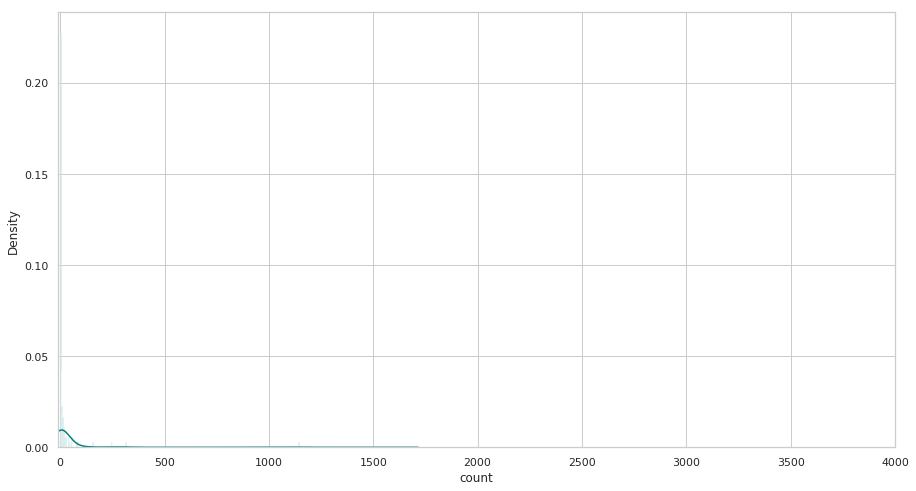

In [124]:
#current distribution:
plt.figure(figsize=(15, 8))
ax = mos_data["count"].hist(bins=500, density=True, stacked=True, color='teal', alpha=0.6)
mos_data["count"].plot(kind='density', color='teal')


ax.set(xlabel="count")
plt.xlim(-10,4000)
plt.show()

In [125]:
mos_data = mos_data[mos_data['count'] <= mos_data.describe()['count']['75%']]

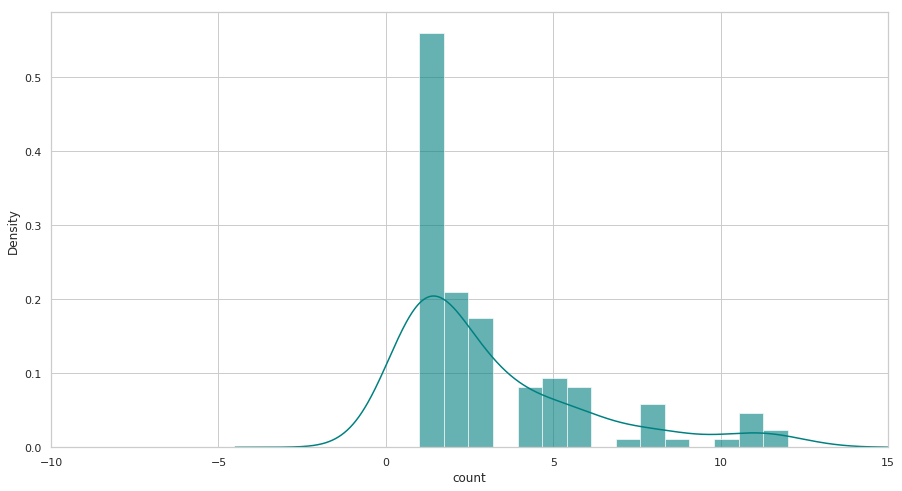

In [126]:
#current distribution:
plt.figure(figsize=(15, 8))
ax = mos_data["count"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
mos_data["count"].plot(kind='density', color='teal')


ax.set(xlabel="count")
plt.xlim(-10,15)
plt.show()

In [127]:
start_remove = mos_data["new_trap_date"].dt.date.min()
end_remove = mos_data["new_trap_date"].dt.date.max() + timedelta(days=6) #final week isn't complete so instead of losing a whole week in the data we are going to add 2 days from the weather data

print(start_remove, end_remove, sep=' ')

weather_data = weather_data.loc[(weather_data["new_date_time_local"] >= start_remove) & (weather_data["new_date_time_local"] <= end_remove) ]

weather_data_range = str(weather_data['new_date_time_local'].dt.date.min())+' to ' + str(weather_data['new_date_time_local'].dt.date.max())
print("Range of dates in weather dataset is {}".format(weather_data_range))

2017-05-09 2018-09-24
Range of dates in weather dataset is 2017-05-09 to 2018-09-24


In [128]:
mos_data.isnull().sum()

genus                 0
specific_epithet      0
gender                0
idd                  93
count                 0
trap_region           0
include             112
comparison_group      0
latitude              0
longitude             0
new_trap_date         0
dtype: int64

In [129]:
len(mos_data.index)

117

drop idd and include columns as they are don't add enough information and mostly NaN

In [130]:
mos_data.drop(columns=["idd", "include"], inplace=True)

### Grouping weather data on date column


In [131]:
len(weather_data.index)

12096

Replace null data in weather_data

In [132]:
weather_data.isnull().sum()

pressure_station         5
pressure_sea             5
wind_dir                84
wind_dir_10s            29
wind_speed               5
relative_humidity        5
dew_point                5
temperature              5
health_index           229
new_date_time_local      0
dtype: int64

In [133]:
weather_data.reset_index(drop=True, inplace=True)

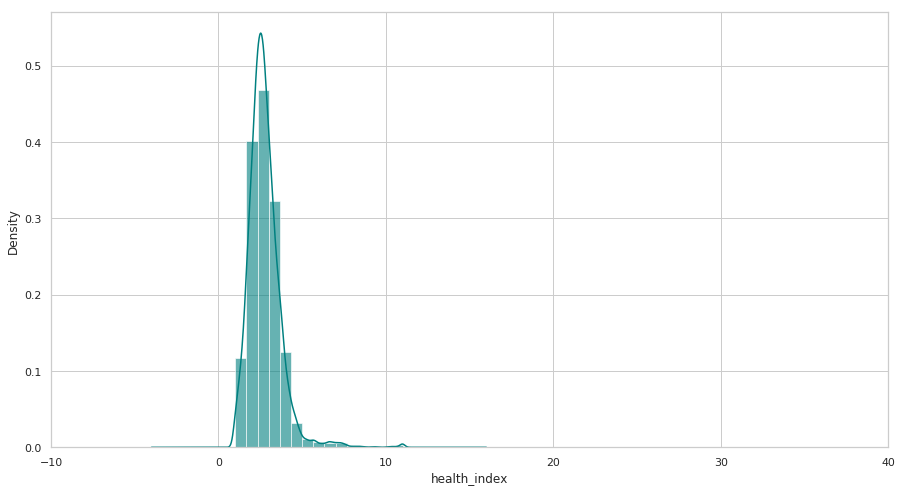

In [134]:
plt.figure(figsize=(15, 8))
ax = orig_weather_data["health_index"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
orig_weather_data["health_index"].plot(kind='density', color='teal')


ax.set(xlabel="health_index")
plt.xlim(-10,40)
plt.show()

It looks like health index is normally distributed so its safe to replace na with mean value:

In [135]:
temp_df = weather_data.copy()
temp_df['health_index'].fillna(temp_df['health_index'].mean())

0        2.1
1        2.2
2        2.1
3        1.9
4        1.9
5        1.9
6        1.9
7        1.8
8        1.7
9        1.7
10       1.6
11       1.7
12       1.8
13       1.9
14       1.9
15       1.8
16       1.8
17       1.5
18       1.4
19       1.4
20       1.3
21       1.3
22       1.4
23       1.6
24       1.7
25       1.7
26       1.8
27       1.7
28       1.7
29       1.7
        ... 
12066    3.2
12067    3.3
12068    3.4
12069    3.6
12070    3.7
12071    3.6
12072    3.3
12073    3.0
12074    3.0
12075    2.9
12076    2.9
12077    2.9
12078    3.0
12079    2.9
12080    2.9
12081    2.7
12082    2.6
12083    2.6
12084    2.7
12085    2.8
12086    2.8
12087    2.7
12088    2.6
12089    2.7
12090    2.9
12091    3.0
12092    3.1
12093    3.4
12094    3.5
12095    3.5
Name: health_index, Length: 12096, dtype: float64

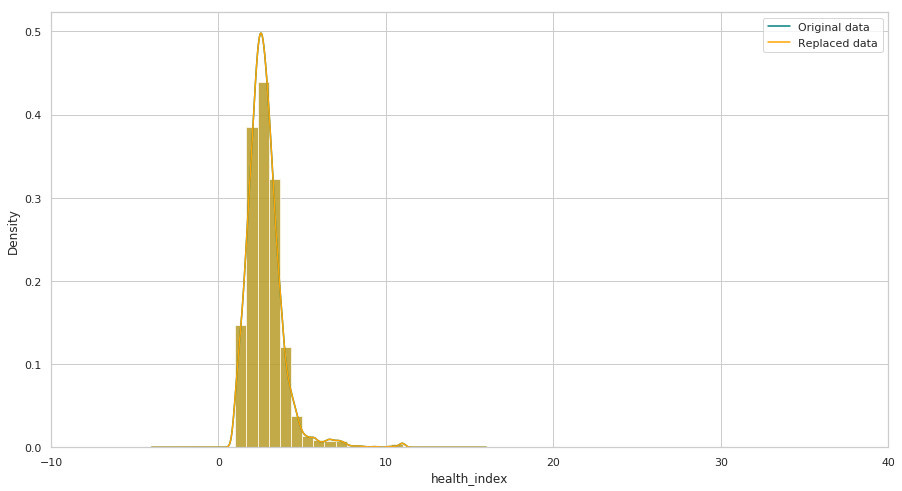

In [136]:
key_to_test = 'health_index'

plt.figure(figsize=(15, 8))
ax = weather_data[key_to_test].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
weather_data[key_to_test].plot(kind='density', color='teal')


ax = temp_df[key_to_test].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.6)
temp_df[key_to_test].plot(kind='density', color='orange')


ax.legend(['Original data', 'Replaced data'])
ax.set(xlabel=key_to_test)
plt.xlim(-10,40)
plt.show()

In [137]:
weather_data['health_index'].fillna(weather_data['health_index'].mean(), inplace=True)

In [138]:
weather_data.isnull().sum()

pressure_station        5
pressure_sea            5
wind_dir               84
wind_dir_10s           29
wind_speed              5
relative_humidity       5
dew_point               5
temperature             5
health_index            0
new_date_time_local     0
dtype: int64

In [139]:
weather_data.head()

,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,new_date_time_local
0,94.01,102.03,WSW,24.0,7.0,91.0,3.9,5.3,2.1,2018-09-24
1,94.00,102.00,WNW,29.0,11.0,82.0,4.3,7.2,2.2,2018-09-24
2,94.01,102.00,NNW,34.0,19.0,71.0,3.1,8.1,2.1,2018-09-24
3,93.89,101.90,WNW,29.0,7.0,63.0,1.8,8.5,1.9,2018-09-24
4,93.87,101.90,NW,32.0,11.0,55.0,1.5,10.3,1.9,2018-09-24


In [140]:
temp_weather_data = weather_data.groupby(weather_data.index // 24).agg({
    "new_date_time_local": 'first',
    "pressure_station": lambda x: round(x.mean(),2),
    "pressure_sea": lambda x: round(x.mean(),1),
    "wind_dir":lambda x: x.value_counts().index[0],
    "wind_dir_10s":lambda x: x.value_counts().index[0],
    "wind_speed":lambda x: round(x.mean(),1),#x.mode().iloc[0],
    "relative_humidity":lambda x: x.median(),
    "dew_point":lambda x: x.median(),
    "temperature":lambda x: x.median(),
    "health_index": lambda x: round(x.mean(),1),
})

temp_weather_data.head()

,new_date_time_local,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index
0,2018-09-24,93.58,101.6,W,27.0,14.5,76.0,2.90,8.00,1.7
1,2018-09-23,93.55,101.6,SW,22.0,10.9,87.0,-0.25,2.25,1.6
2,2018-09-22,94.12,102.3,E,9.0,15.2,90.5,-1.50,0.00,1.6
3,2018-09-21,94.35,102.5,ENE,8.0,11.8,86.5,-0.85,0.50,1.9
4,2018-09-20,94.15,102.2,NNE,3.0,11.5,72.5,1.00,4.25,2.1


In [141]:
temp_weather_data.isnull().sum()

new_date_time_local    0
pressure_station       0
pressure_sea           0
wind_dir               0
wind_dir_10s           0
wind_speed             0
relative_humidity      0
dew_point              0
temperature            0
health_index           0
dtype: int64

In [142]:
weather_data['pressure_station'] = weather_data.groupby("new_date_time_local", sort=False)["pressure_station"].apply(lambda x: x.fillna(round(x.mean(),2)))

weather_data['pressure_sea'] = weather_data.groupby("new_date_time_local", sort=False)["pressure_sea"].apply(lambda x: x.fillna(round(x.mean(),1)))

weather_data['wind_dir'] = weather_data.groupby("new_date_time_local", sort=False)["wind_dir"].apply(lambda x: x.fillna(x.value_counts().index[0]))


weather_data['wind_dir_10s'] = weather_data.groupby("new_date_time_local", sort=False)["wind_dir_10s"].apply(lambda x: x.fillna(x.value_counts().index[0]))


weather_data['wind_speed'] = weather_data.groupby("new_date_time_local", sort=False)["wind_speed"].apply(lambda x: x.fillna(round(x.mean(),1)))

weather_data['relative_humidity'] = weather_data.groupby("new_date_time_local", sort=False)["relative_humidity"].apply(lambda x: x.fillna(x.median()))


weather_data['dew_point'] = weather_data.groupby("new_date_time_local", sort=False)["dew_point"].apply(lambda x: x.fillna(x.median()))


weather_data['temperature'] = weather_data.groupby("new_date_time_local", sort=False)["temperature"].apply(lambda x: x.fillna(x.median()))




print(weather_data.isnull().sum())
weather_data.head()

pressure_station       0
pressure_sea           0
wind_dir               0
wind_dir_10s           0
wind_speed             0
relative_humidity      0
dew_point              0
temperature            0
health_index           0
new_date_time_local    0
dtype: int64


,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,new_date_time_local
0,94.01,102.03,WSW,24.0,7.0,91.0,3.9,5.3,2.1,2018-09-24
1,94.00,102.00,WNW,29.0,11.0,82.0,4.3,7.2,2.2,2018-09-24
2,94.01,102.00,NNW,34.0,19.0,71.0,3.1,8.1,2.1,2018-09-24
3,93.89,101.90,WNW,29.0,7.0,63.0,1.8,8.5,1.9,2018-09-24
4,93.87,101.90,NW,32.0,11.0,55.0,1.5,10.3,1.9,2018-09-24


In [143]:
len(weather_data.index)

12096

Now that all NaNs are replaced its time to create subsets of the weather data.

In [144]:
weather_data_A = weather_data.groupby('new_date_time_local', as_index=False).apply(lambda x: x.iloc[:6]).droplevel(0)
weather_data_A.head(7)

,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,new_date_time_local
12072,93.60,101.5,ESE,12.0,6.0,48.0,2.0,12.8,3.3,2017-05-09
12073,93.61,101.5,NW,12.0,1.0,41.0,0.6,13.5,3.0,2017-05-09
12074,93.59,101.5,SSW,20.0,2.0,33.0,-0.7,15.6,3.0,2017-05-09
12075,93.60,101.5,S,20.0,3.0,32.0,0.3,16.9,2.9,2017-05-09
12076,93.62,101.5,WSW,24.0,5.0,30.0,-0.9,16.7,2.9,2017-05-09
12077,93.64,101.5,S,32.0,3.0,30.0,-0.6,17.2,2.9,2017-05-09
12048,93.54,101.4,ENE,7.0,6.0,58.0,4.4,12.6,3.3,2017-05-10


In [145]:
weather_data_B = weather_data.groupby('new_date_time_local', as_index=False).apply(lambda x: x.iloc[6:12]).droplevel(0)
weather_data_B.head(7)

,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,new_date_time_local
12078,93.67,101.5,WSW,27.0,5.0,28.0,0.1,18.8,3.0,2017-05-09
12079,93.74,101.6,SW,21.0,13.0,31.0,-0.5,16.7,2.9,2017-05-09
12080,93.78,101.7,SSW,25.0,6.0,34.0,0.4,16.5,2.9,2017-05-09
12081,93.77,101.7,WSW,22.0,5.0,34.0,0.1,16.0,2.7,2017-05-09
12082,93.81,101.7,SSE,14.0,6.0,34.0,1.2,17.1,2.6,2017-05-09
12083,93.88,101.8,NNE,34.0,7.0,40.0,1.8,15.3,2.6,2017-05-09
12054,93.48,101.4,SW,26.0,20.0,54.0,6.3,15.6,3.5,2017-05-10


In [146]:
weather_data_C = weather_data.groupby('new_date_time_local', as_index=False).apply(lambda x: x.iloc[12:18]).droplevel(0)
weather_data_C.head(7)

,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,new_date_time_local
12084,93.91,101.8,NW,32.0,14.0,42.0,2.3,15.1,2.7,2017-05-09
12085,93.94,101.9,NNW,35.0,15.0,48.0,2.6,13.5,2.8,2017-05-09
12086,93.91,101.8,NNW,36.0,15.0,48.0,2.2,12.9,2.8,2017-05-09
12087,93.88,101.8,NW,32.0,7.0,51.0,2.1,11.9,2.7,2017-05-09
12088,93.85,101.8,NW,31.0,9.0,55.0,1.5,10.0,2.6,2017-05-09
12089,93.80,101.7,NW,33.0,11.0,61.0,2.1,9.2,2.7,2017-05-09
12060,93.44,101.3,ENE,7.0,15.0,40.0,3.0,16.6,3.7,2017-05-10


In [147]:
weather_data_D = weather_data.groupby('new_date_time_local', as_index=False).apply(lambda x: x.iloc[18:24]).droplevel(0)
weather_data_D.head(7)

,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,new_date_time_local
12090,93.77,101.7,NW,30.0,7.0,56.0,1.5,9.9,2.9,2017-05-09
12091,93.71,101.6,N,33.0,3.0,48.0,-0.1,10.5,3.0,2017-05-09
12092,93.67,101.5,NW,31.0,7.0,48.0,0.9,11.4,3.1,2017-05-09
12093,93.65,101.5,WSW,23.0,5.0,42.0,-0.8,11.7,3.4,2017-05-09
12094,93.65,101.5,WSW,26.0,7.0,36.0,-2.0,12.8,3.5,2017-05-09
12095,93.62,101.5,ESE,36.0,1.0,41.0,-0.6,12.1,3.5,2017-05-09
12066,93.50,101.4,E,8.0,7.0,53.0,2.2,11.4,3.2,2017-05-10


In [148]:
mos_data.head()

,genus,specific_epithet,gender,count,trap_region,comparison_group,latitude,longitude,new_trap_date
4,Culiseta,impatiens,Female,2,Rural-West,Outer,53.559020,-114.001190,2018-05-15
6,Aedes,vexans,Female,11,Rural-East,Outer,53.606722,-113.221359,2018-08-07
14,Aedes,dorsalis,Female,1,Rural-West,Outer,53.562973,-113.787353,2017-06-13
18,Culiseta,inornata,Female,5,Rural-West,Outer,53.562973,-113.787353,2017-06-20
20,Culex,territans,Female,1,Rural-South West,Peripheral,53.528587,-113.738070,2017-08-15


In [149]:
mos_data.sort_values(by='new_trap_date', inplace=True)

In [150]:
weather_data_A.sort_values(by='new_date_time_local', inplace=True)
weather_data_B.sort_values(by='new_date_time_local', inplace=True)
weather_data_C.sort_values(by='new_date_time_local', inplace=True)
weather_data_D.sort_values(by='new_date_time_local', inplace=True)

In [151]:
count_df = weather_data_A.groupby(["new_date_time_local"]).size().reset_index(name='count')
count_df = count_df.loc[(count_df["count"] != 6)]

count_df

,new_date_time_local,count


In [152]:
count_df = weather_data_B.groupby(["new_date_time_local"]).size().reset_index(name='count')
count_df = count_df.loc[(count_df["count"] != 6)]

count_df

,new_date_time_local,count


In [153]:
count_df = weather_data_C.groupby(["new_date_time_local"]).size().reset_index(name='count')
count_df = count_df.loc[(count_df["count"] != 6)]

count_df

,new_date_time_local,count


In [154]:
count_df = weather_data_D.groupby(["new_date_time_local"]).size().reset_index(name='count')
count_df = count_df.loc[(count_df["count"] != 6)]

count_df

,new_date_time_local,count


## Combine both datasets

In [155]:
mos_data.head()

,genus,specific_epithet,gender,count,trap_region,comparison_group,latitude,longitude,new_trap_date
871,Culiseta,inornata,Female,1,Rural-South East,Peripheral,53.395831,-113.393540,2017-05-09
888,Culiseta,alaskaensis,Female,1,Residential GC-South,Core,53.482057,-113.418346,2017-05-16
977,Ochlerotatus,Black legs,Female,6,Rural-West,Outer,53.562973,-113.787353,2017-05-23
688,Ochlerotatus,euedes,Female,3,Outer Community-North,Outer,53.774476,-113.585715,2017-05-23
991,Culiseta,alaskaensis,Female,1,River Valley-West,Core,53.504068,-113.570126,2017-05-30


In [156]:
weather_data_A.head()

,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index,new_date_time_local
12072,93.60,101.5,ESE,12.0,6.0,48.0,2.0,12.8,3.3,2017-05-09
12073,93.61,101.5,NW,12.0,1.0,41.0,0.6,13.5,3.0,2017-05-09
12074,93.59,101.5,SSW,20.0,2.0,33.0,-0.7,15.6,3.0,2017-05-09
12075,93.60,101.5,S,20.0,3.0,32.0,0.3,16.9,2.9,2017-05-09
12076,93.62,101.5,WSW,24.0,5.0,30.0,-0.9,16.7,2.9,2017-05-09


In [157]:
weather_data_A_final = weather_data_A.groupby('new_date_time_local', as_index=False).agg({
    "pressure_station": lambda x: round(x.mean(),2),
    "pressure_sea": lambda x: round(x.mean(),1),
    "wind_dir":lambda x: x.value_counts().index[0],
    "wind_dir_10s":lambda x: x.value_counts().index[0],
    "wind_speed":lambda x: round(x.mean(),1),#x.mode().iloc[0],
    "relative_humidity":lambda x: x.median(),
    "dew_point":lambda x: x.median(),
    "temperature":lambda x: x.median(),
    "health_index": lambda x: round(x.mean(),1),
})

weather_data_B_final = weather_data_A.groupby('new_date_time_local', as_index=False).agg({
    "pressure_station": lambda x: round(x.mean(),2),
    "pressure_sea": lambda x: round(x.mean(),1),
    "wind_dir":lambda x: x.value_counts().index[0],
    "wind_dir_10s":lambda x: x.value_counts().index[0],
    "wind_speed":lambda x: round(x.mean(),1),#x.mode().iloc[0],
    "relative_humidity":lambda x: x.median(),
    "dew_point":lambda x: x.median(),
    "temperature":lambda x: x.median(),
    "health_index": lambda x: round(x.mean(),1),
})

weather_data_C_final = weather_data_A.groupby('new_date_time_local', as_index=False).agg({
    "pressure_station": lambda x: round(x.mean(),2),
    "pressure_sea": lambda x: round(x.mean(),1),
    "wind_dir":lambda x: x.value_counts().index[0],
    "wind_dir_10s":lambda x: x.value_counts().index[0],
    "wind_speed":lambda x: round(x.mean(),1),#x.mode().iloc[0],
    "relative_humidity":lambda x: x.median(),
    "dew_point":lambda x: x.median(),
    "temperature":lambda x: x.median(),
    "health_index": lambda x: round(x.mean(),1),
})

weather_data_D_final = weather_data_A.groupby('new_date_time_local', as_index=False).agg({
    "pressure_station": lambda x: round(x.mean(),2),
    "pressure_sea": lambda x: round(x.mean(),1),
    "wind_dir":lambda x: x.value_counts().index[0],
    "wind_dir_10s":lambda x: x.value_counts().index[0],
    "wind_speed":lambda x: round(x.mean(),1),#x.mode().iloc[0],
    "relative_humidity":lambda x: x.median(),
    "dew_point":lambda x: x.median(),
    "temperature":lambda x: x.median(),
    "health_index": lambda x: round(x.mean(),1),
})

In [158]:
weather_data_A_final.sort_values(by='new_date_time_local', inplace=True)
weather_data_A_final.reset_index(drop=True, inplace=True)

weather_data_B_final.sort_values(by='new_date_time_local', inplace=True)
weather_data_B_final.reset_index(drop=True, inplace=True)

weather_data_C_final.sort_values(by='new_date_time_local', inplace=True)
weather_data_C_final.reset_index(drop=True, inplace=True)

weather_data_D_final.sort_values(by='new_date_time_local', inplace=True)
weather_data_D_final.reset_index(drop=True, inplace=True)

In [159]:
weather_data_A_final.tail()

,new_date_time_local,pressure_station,pressure_sea,wind_dir,wind_dir_10s,wind_speed,relative_humidity,dew_point,temperature,health_index
499,2018-09-20,94.49,102.6,NE,3.0,13.7,59.0,-2.80,4.20,1.8
500,2018-09-21,94.32,102.5,ESE,9.0,9.7,80.0,-2.30,0.75,2.1
501,2018-09-22,94.06,102.2,SE,13.0,15.2,88.0,-1.55,0.05,1.6
502,2018-09-23,93.33,101.4,SW,22.0,10.2,79.0,1.75,5.60,1.7
503,2018-09-24,93.93,101.9,NW,29.0,12.3,67.0,2.70,8.30,2.0


In [160]:
len(weather_data_A_final.index)

504

In [161]:
new_date_time_local_df = weather_data_A_final.groupby(weather_data_A_final.index // 7)["new_date_time_local"].agg([
    ('date', 'first')
])

pressure_station_df =  weather_data_A_final.groupby(weather_data_A_final.index // 7)["pressure_station"].agg([
    ('pressure_station_1', lambda x: x.iloc[0]),
    ('pressure_station_2', lambda x: x.iloc[1]),
    ('pressure_station_3', lambda x: x.iloc[2]),
    ('pressure_station_4', lambda x: x.iloc[3]),
    ('pressure_station_5', lambda x: x.iloc[4]),
    ('pressure_station_6', lambda x: x.iloc[5]),
    ('pressure_station_7', lambda x: x.iloc[6]),
    
    
])

pressure_sea_df =  weather_data_A_final.groupby(weather_data_A_final.index // 7)["pressure_sea"].agg([
    ('pressure_sea_1', lambda x: x.iloc[0]),
    ('pressure_sea_2', lambda x: x.iloc[1]),
    ('pressure_sea_3', lambda x: x.iloc[2]),
    ('pressure_sea_4', lambda x: x.iloc[3]),
    ('pressure_sea_5', lambda x: x.iloc[4]),
    ('pressure_sea_6', lambda x: x.iloc[5]),
    ('pressure_sea_7', lambda x: x.iloc[6]),
    
    
])

wind_dir_df =  weather_data_A_final.groupby(weather_data_A_final.index // 7)["wind_dir"].agg([
    ('wind_dir_1', lambda x: x.iloc[0]),
    ('wind_dir_2', lambda x: x.iloc[1]),
    ('wind_dir_3', lambda x: x.iloc[2]),
    ('wind_dir_4', lambda x: x.iloc[3]),
    ('wind_dir_5', lambda x: x.iloc[4]),
    ('wind_dir_6', lambda x: x.iloc[5]),
    ('wind_dir_7', lambda x: x.iloc[6]),
    
    
])

wind_dir_10s_df =  weather_data_A_final.groupby(weather_data_A_final.index // 7)["wind_dir_10s"].agg([
    ('wind_dir_10s_1', lambda x: x.iloc[0]),
    ('wind_dir_10s_2', lambda x: x.iloc[1]),
    ('wind_dir_10s_3', lambda x: x.iloc[2]),
    ('wind_dir_10s_4', lambda x: x.iloc[3]),
    ('wind_dir_10s_5', lambda x: x.iloc[4]),
    ('wind_dir_10s_6', lambda x: x.iloc[5]),
    ('wind_dir_10s_7', lambda x: x.iloc[6]),
    
    
])

wind_speed_df =  weather_data_A_final.groupby(weather_data_A_final.index // 7)["wind_speed"].agg([
    ('wind_speed_1', lambda x: x.iloc[0]),
    ('wind_speed_2', lambda x: x.iloc[1]),
    ('wind_speed_3', lambda x: x.iloc[2]),
    ('wind_speed_4', lambda x: x.iloc[3]),
    ('wind_speed_5', lambda x: x.iloc[4]),
    ('wind_speed_6', lambda x: x.iloc[5]),
    ('wind_speed_7', lambda x: x.iloc[6]),
    
    
])

relative_humidity_df =  weather_data_A_final.groupby(weather_data_A_final.index // 7)["relative_humidity"].agg([
    ('relative_humidity_1', lambda x: x.iloc[0]),
    ('relative_humidity_2', lambda x: x.iloc[1]),
    ('relative_humidity_3', lambda x: x.iloc[2]),
    ('relative_humidity_4', lambda x: x.iloc[3]),
    ('relative_humidity_5', lambda x: x.iloc[4]),
    ('relative_humidity_6', lambda x: x.iloc[5]),
    ('relative_humidity_7', lambda x: x.iloc[6]),
    
    
])

dew_point_df =  weather_data_A_final.groupby(weather_data_A_final.index // 7)["dew_point"].agg([
    ('dew_point_1', lambda x: x.iloc[0]),
    ('dew_point_2', lambda x: x.iloc[1]),
    ('dew_point_3', lambda x: x.iloc[2]),
    ('dew_point_4', lambda x: x.iloc[3]),
    ('dew_point_5', lambda x: x.iloc[4]),
    ('dew_point_6', lambda x: x.iloc[5]),
    ('dew_point_7', lambda x: x.iloc[6]),
    
    
])

temperature_df =  weather_data_A_final.groupby(weather_data_A_final.index // 7)["temperature"].agg([
    ('temperature_1', lambda x: x.iloc[0]),
    ('temperature_2', lambda x: x.iloc[1]),
    ('temperature_3', lambda x: x.iloc[2]),
    ('temperature_4', lambda x: x.iloc[3]),
    ('temperature_5', lambda x: x.iloc[4]),
    ('temperature_6', lambda x: x.iloc[5]),
    ('temperature_7', lambda x: x.iloc[6]),
    
    
])



health_index_df =  weather_data_A_final.groupby(weather_data_A_final.index // 7)["health_index"].agg([
    ('health_index_1', lambda x: x.iloc[0]),
    ('health_index_2', lambda x: x.iloc[1]),
    ('health_index_3', lambda x: x.iloc[2]),
    ('health_index_4', lambda x: x.iloc[3]),
    ('health_index_5', lambda x: x.iloc[4]),
    ('health_index_6', lambda x: x.iloc[5]),
    ('health_index_7', lambda x: x.iloc[6]),
    
    
])


temp_df_A = pd.concat([new_date_time_local_df.reset_index(drop=True), pressure_station_df.reset_index(drop=True),pressure_sea_df.reset_index(drop=True), wind_dir_df.reset_index(drop=True), wind_dir_10s_df.reset_index(drop=True), wind_speed_df.reset_index(drop=True), relative_humidity_df.reset_index(drop=True), dew_point_df.reset_index(drop=True), temperature_df.reset_index(drop=True), health_index_df.reset_index(drop=True) ], axis=1)

temp_df_A.head()

,date,pressure_station_1,pressure_station_2,pressure_station_3,pressure_station_4,pressure_station_5,pressure_station_6,pressure_station_7,pressure_sea_1,pressure_sea_2,...,temperature_5,temperature_6,temperature_7,health_index_1,health_index_2,health_index_3,health_index_4,health_index_5,health_index_6,health_index_7
0,2017-05-09,93.61,93.46,93.19,92.67,92.85,92.88,92.94,101.5,101.3,...,7.85,8.30,6.75,3.0,3.3,3.1,2.6,1.4,1.6,2.3
1,2017-05-16,93.32,94.16,93.76,93.63,93.91,93.99,93.80,101.3,102.2,...,20.50,21.85,23.10,1.7,2.4,2.3,2.5,2.8,2.9,2.6
2,2017-05-23,91.71,92.12,92.97,93.06,93.94,94.48,94.09,99.3,99.9,...,21.30,16.95,19.20,2.9,2.2,2.1,2.4,2.6,2.7,2.9
3,2017-05-30,93.21,92.56,92.53,93.15,93.09,93.23,93.97,101.0,100.2,...,21.80,19.45,20.25,3.4,4.0,3.3,2.6,3.6,2.8,2.5
4,2017-06-06,93.80,93.51,92.52,91.91,92.27,93.12,92.67,101.6,101.3,...,15.65,13.60,22.90,3.4,3.3,3.7,1.9,2.1,1.7,3.1


In [162]:
new_date_time_local_df = weather_data_B_final.groupby(weather_data_B_final.index // 7)["new_date_time_local"].agg([
    ('date', 'first')
])

pressure_station_df =  weather_data_B_final.groupby(weather_data_B_final.index // 7)["pressure_station"].agg([
    ('pressure_station_1', lambda x: x.iloc[0]),
    ('pressure_station_2', lambda x: x.iloc[1]),
    ('pressure_station_3', lambda x: x.iloc[2]),
    ('pressure_station_4', lambda x: x.iloc[3]),
    ('pressure_station_5', lambda x: x.iloc[4]),
    ('pressure_station_6', lambda x: x.iloc[5]),
    ('pressure_station_7', lambda x: x.iloc[6]),
    
    
])

pressure_sea_df =  weather_data_B_final.groupby(weather_data_B_final.index // 7)["pressure_sea"].agg([
    ('pressure_sea_1', lambda x: x.iloc[0]),
    ('pressure_sea_2', lambda x: x.iloc[1]),
    ('pressure_sea_3', lambda x: x.iloc[2]),
    ('pressure_sea_4', lambda x: x.iloc[3]),
    ('pressure_sea_5', lambda x: x.iloc[4]),
    ('pressure_sea_6', lambda x: x.iloc[5]),
    ('pressure_sea_7', lambda x: x.iloc[6]),
    
    
])

wind_dir_df =  weather_data_B_final.groupby(weather_data_B_final.index // 7)["wind_dir"].agg([
    ('wind_dir_1', lambda x: x.iloc[0]),
    ('wind_dir_2', lambda x: x.iloc[1]),
    ('wind_dir_3', lambda x: x.iloc[2]),
    ('wind_dir_4', lambda x: x.iloc[3]),
    ('wind_dir_5', lambda x: x.iloc[4]),
    ('wind_dir_6', lambda x: x.iloc[5]),
    ('wind_dir_7', lambda x: x.iloc[6]),
    
    
])

wind_dir_10s_df =  weather_data_B_final.groupby(weather_data_B_final.index // 7)["wind_dir_10s"].agg([
    ('wind_dir_10s_1', lambda x: x.iloc[0]),
    ('wind_dir_10s_2', lambda x: x.iloc[1]),
    ('wind_dir_10s_3', lambda x: x.iloc[2]),
    ('wind_dir_10s_4', lambda x: x.iloc[3]),
    ('wind_dir_10s_5', lambda x: x.iloc[4]),
    ('wind_dir_10s_6', lambda x: x.iloc[5]),
    ('wind_dir_10s_7', lambda x: x.iloc[6]),
    
    
])

wind_speed_df =  weather_data_B_final.groupby(weather_data_B_final.index // 7)["wind_speed"].agg([
    ('wind_speed_1', lambda x: x.iloc[0]),
    ('wind_speed_2', lambda x: x.iloc[1]),
    ('wind_speed_3', lambda x: x.iloc[2]),
    ('wind_speed_4', lambda x: x.iloc[3]),
    ('wind_speed_5', lambda x: x.iloc[4]),
    ('wind_speed_6', lambda x: x.iloc[5]),
    ('wind_speed_7', lambda x: x.iloc[6]),
    
    
])

relative_humidity_df =  weather_data_B_final.groupby(weather_data_B_final.index // 7)["relative_humidity"].agg([
    ('relative_humidity_1', lambda x: x.iloc[0]),
    ('relative_humidity_2', lambda x: x.iloc[1]),
    ('relative_humidity_3', lambda x: x.iloc[2]),
    ('relative_humidity_4', lambda x: x.iloc[3]),
    ('relative_humidity_5', lambda x: x.iloc[4]),
    ('relative_humidity_6', lambda x: x.iloc[5]),
    ('relative_humidity_7', lambda x: x.iloc[6]),
    
    
])

dew_point_df =  weather_data_B_final.groupby(weather_data_B_final.index // 7)["dew_point"].agg([
    ('dew_point_1', lambda x: x.iloc[0]),
    ('dew_point_2', lambda x: x.iloc[1]),
    ('dew_point_3', lambda x: x.iloc[2]),
    ('dew_point_4', lambda x: x.iloc[3]),
    ('dew_point_5', lambda x: x.iloc[4]),
    ('dew_point_6', lambda x: x.iloc[5]),
    ('dew_point_7', lambda x: x.iloc[6]),
    
    
])

temperature_df =  weather_data_B_final.groupby(weather_data_B_final.index // 7)["temperature"].agg([
    ('temperature_1', lambda x: x.iloc[0]),
    ('temperature_2', lambda x: x.iloc[1]),
    ('temperature_3', lambda x: x.iloc[2]),
    ('temperature_4', lambda x: x.iloc[3]),
    ('temperature_5', lambda x: x.iloc[4]),
    ('temperature_6', lambda x: x.iloc[5]),
    ('temperature_7', lambda x: x.iloc[6]),
    
    
])



health_index_df =  weather_data_B_final.groupby(weather_data_B_final.index // 7)["health_index"].agg([
    ('health_index_1', lambda x: x.iloc[0]),
    ('health_index_2', lambda x: x.iloc[1]),
    ('health_index_3', lambda x: x.iloc[2]),
    ('health_index_4', lambda x: x.iloc[3]),
    ('health_index_5', lambda x: x.iloc[4]),
    ('health_index_6', lambda x: x.iloc[5]),
    ('health_index_7', lambda x: x.iloc[6]),
    
    
])


temp_df_B = pd.concat([new_date_time_local_df.reset_index(drop=True), pressure_station_df.reset_index(drop=True),pressure_sea_df.reset_index(drop=True), wind_dir_df.reset_index(drop=True), wind_dir_10s_df.reset_index(drop=True), wind_speed_df.reset_index(drop=True), relative_humidity_df.reset_index(drop=True), dew_point_df.reset_index(drop=True), temperature_df.reset_index(drop=True), health_index_df.reset_index(drop=True) ], axis=1)

In [163]:
new_date_time_local_df = weather_data_C_final.groupby(weather_data_C_final.index // 7)["new_date_time_local"].agg([
    ('date', 'first')
])

pressure_station_df =  weather_data_C_final.groupby(weather_data_C_final.index // 7)["pressure_station"].agg([
    ('pressure_station_1', lambda x: x.iloc[0]),
    ('pressure_station_2', lambda x: x.iloc[1]),
    ('pressure_station_3', lambda x: x.iloc[2]),
    ('pressure_station_4', lambda x: x.iloc[3]),
    ('pressure_station_5', lambda x: x.iloc[4]),
    ('pressure_station_6', lambda x: x.iloc[5]),
    ('pressure_station_7', lambda x: x.iloc[6]),
    
    
])

pressure_sea_df =  weather_data_C_final.groupby(weather_data_C_final.index // 7)["pressure_sea"].agg([
    ('pressure_sea_1', lambda x: x.iloc[0]),
    ('pressure_sea_2', lambda x: x.iloc[1]),
    ('pressure_sea_3', lambda x: x.iloc[2]),
    ('pressure_sea_4', lambda x: x.iloc[3]),
    ('pressure_sea_5', lambda x: x.iloc[4]),
    ('pressure_sea_6', lambda x: x.iloc[5]),
    ('pressure_sea_7', lambda x: x.iloc[6]),
    
    
])

wind_dir_df =  weather_data_C_final.groupby(weather_data_C_final.index // 7)["wind_dir"].agg([
    ('wind_dir_1', lambda x: x.iloc[0]),
    ('wind_dir_2', lambda x: x.iloc[1]),
    ('wind_dir_3', lambda x: x.iloc[2]),
    ('wind_dir_4', lambda x: x.iloc[3]),
    ('wind_dir_5', lambda x: x.iloc[4]),
    ('wind_dir_6', lambda x: x.iloc[5]),
    ('wind_dir_7', lambda x: x.iloc[6]),
    
    
])

wind_dir_10s_df =  weather_data_C_final.groupby(weather_data_C_final.index // 7)["wind_dir_10s"].agg([
    ('wind_dir_10s_1', lambda x: x.iloc[0]),
    ('wind_dir_10s_2', lambda x: x.iloc[1]),
    ('wind_dir_10s_3', lambda x: x.iloc[2]),
    ('wind_dir_10s_4', lambda x: x.iloc[3]),
    ('wind_dir_10s_5', lambda x: x.iloc[4]),
    ('wind_dir_10s_6', lambda x: x.iloc[5]),
    ('wind_dir_10s_7', lambda x: x.iloc[6]),
    
    
])

wind_speed_df =  weather_data_C_final.groupby(weather_data_C_final.index // 7)["wind_speed"].agg([
    ('wind_speed_1', lambda x: x.iloc[0]),
    ('wind_speed_2', lambda x: x.iloc[1]),
    ('wind_speed_3', lambda x: x.iloc[2]),
    ('wind_speed_4', lambda x: x.iloc[3]),
    ('wind_speed_5', lambda x: x.iloc[4]),
    ('wind_speed_6', lambda x: x.iloc[5]),
    ('wind_speed_7', lambda x: x.iloc[6]),
    
    
])

relative_humidity_df =  weather_data_C_final.groupby(weather_data_C_final.index // 7)["relative_humidity"].agg([
    ('relative_humidity_1', lambda x: x.iloc[0]),
    ('relative_humidity_2', lambda x: x.iloc[1]),
    ('relative_humidity_3', lambda x: x.iloc[2]),
    ('relative_humidity_4', lambda x: x.iloc[3]),
    ('relative_humidity_5', lambda x: x.iloc[4]),
    ('relative_humidity_6', lambda x: x.iloc[5]),
    ('relative_humidity_7', lambda x: x.iloc[6]),
    
    
])

dew_point_df =  weather_data_C_final.groupby(weather_data_C_final.index // 7)["dew_point"].agg([
    ('dew_point_1', lambda x: x.iloc[0]),
    ('dew_point_2', lambda x: x.iloc[1]),
    ('dew_point_3', lambda x: x.iloc[2]),
    ('dew_point_4', lambda x: x.iloc[3]),
    ('dew_point_5', lambda x: x.iloc[4]),
    ('dew_point_6', lambda x: x.iloc[5]),
    ('dew_point_7', lambda x: x.iloc[6]),
    
    
])

temperature_df =  weather_data_C_final.groupby(weather_data_C_final.index // 7)["temperature"].agg([
    ('temperature_1', lambda x: x.iloc[0]),
    ('temperature_2', lambda x: x.iloc[1]),
    ('temperature_3', lambda x: x.iloc[2]),
    ('temperature_4', lambda x: x.iloc[3]),
    ('temperature_5', lambda x: x.iloc[4]),
    ('temperature_6', lambda x: x.iloc[5]),
    ('temperature_7', lambda x: x.iloc[6]),
    
    
])



health_index_df =  weather_data_C_final.groupby(weather_data_C_final.index // 7)["health_index"].agg([
    ('health_index_1', lambda x: x.iloc[0]),
    ('health_index_2', lambda x: x.iloc[1]),
    ('health_index_3', lambda x: x.iloc[2]),
    ('health_index_4', lambda x: x.iloc[3]),
    ('health_index_5', lambda x: x.iloc[4]),
    ('health_index_6', lambda x: x.iloc[5]),
    ('health_index_7', lambda x: x.iloc[6]),
    
    
])


temp_df_C = pd.concat([new_date_time_local_df.reset_index(drop=True), pressure_station_df.reset_index(drop=True),pressure_sea_df.reset_index(drop=True), wind_dir_df.reset_index(drop=True), wind_dir_10s_df.reset_index(drop=True), wind_speed_df.reset_index(drop=True), relative_humidity_df.reset_index(drop=True), dew_point_df.reset_index(drop=True), temperature_df.reset_index(drop=True), health_index_df.reset_index(drop=True) ], axis=1)

In [164]:
new_date_time_local_df = weather_data_D_final.groupby(weather_data_D_final.index // 7)["new_date_time_local"].agg([
    ('date', 'first')
])

pressure_station_df =  weather_data_D_final.groupby(weather_data_D_final.index // 7)["pressure_station"].agg([
    ('pressure_station_1', lambda x: x.iloc[0]),
    ('pressure_station_2', lambda x: x.iloc[1]),
    ('pressure_station_3', lambda x: x.iloc[2]),
    ('pressure_station_4', lambda x: x.iloc[3]),
    ('pressure_station_5', lambda x: x.iloc[4]),
    ('pressure_station_6', lambda x: x.iloc[5]),
    ('pressure_station_7', lambda x: x.iloc[6]),
    
    
])

pressure_sea_df =  weather_data_D_final.groupby(weather_data_D_final.index // 7)["pressure_sea"].agg([
    ('pressure_sea_1', lambda x: x.iloc[0]),
    ('pressure_sea_2', lambda x: x.iloc[1]),
    ('pressure_sea_3', lambda x: x.iloc[2]),
    ('pressure_sea_4', lambda x: x.iloc[3]),
    ('pressure_sea_5', lambda x: x.iloc[4]),
    ('pressure_sea_6', lambda x: x.iloc[5]),
    ('pressure_sea_7', lambda x: x.iloc[6]),
    
    
])

wind_dir_df =  weather_data_D_final.groupby(weather_data_D_final.index // 7)["wind_dir"].agg([
    ('wind_dir_1', lambda x: x.iloc[0]),
    ('wind_dir_2', lambda x: x.iloc[1]),
    ('wind_dir_3', lambda x: x.iloc[2]),
    ('wind_dir_4', lambda x: x.iloc[3]),
    ('wind_dir_5', lambda x: x.iloc[4]),
    ('wind_dir_6', lambda x: x.iloc[5]),
    ('wind_dir_7', lambda x: x.iloc[6]),
    
    
])

wind_dir_10s_df =  weather_data_D_final.groupby(weather_data_D_final.index // 7)["wind_dir_10s"].agg([
    ('wind_dir_10s_1', lambda x: x.iloc[0]),
    ('wind_dir_10s_2', lambda x: x.iloc[1]),
    ('wind_dir_10s_3', lambda x: x.iloc[2]),
    ('wind_dir_10s_4', lambda x: x.iloc[3]),
    ('wind_dir_10s_5', lambda x: x.iloc[4]),
    ('wind_dir_10s_6', lambda x: x.iloc[5]),
    ('wind_dir_10s_7', lambda x: x.iloc[6]),
    
    
])

wind_speed_df =  weather_data_D_final.groupby(weather_data_D_final.index // 7)["wind_speed"].agg([
    ('wind_speed_1', lambda x: x.iloc[0]),
    ('wind_speed_2', lambda x: x.iloc[1]),
    ('wind_speed_3', lambda x: x.iloc[2]),
    ('wind_speed_4', lambda x: x.iloc[3]),
    ('wind_speed_5', lambda x: x.iloc[4]),
    ('wind_speed_6', lambda x: x.iloc[5]),
    ('wind_speed_7', lambda x: x.iloc[6]),
    
    
])

relative_humidity_df =  weather_data_D_final.groupby(weather_data_D_final.index // 7)["relative_humidity"].agg([
    ('relative_humidity_1', lambda x: x.iloc[0]),
    ('relative_humidity_2', lambda x: x.iloc[1]),
    ('relative_humidity_3', lambda x: x.iloc[2]),
    ('relative_humidity_4', lambda x: x.iloc[3]),
    ('relative_humidity_5', lambda x: x.iloc[4]),
    ('relative_humidity_6', lambda x: x.iloc[5]),
    ('relative_humidity_7', lambda x: x.iloc[6]),
    
    
])

dew_point_df =  weather_data_D_final.groupby(weather_data_D_final.index // 7)["dew_point"].agg([
    ('dew_point_1', lambda x: x.iloc[0]),
    ('dew_point_2', lambda x: x.iloc[1]),
    ('dew_point_3', lambda x: x.iloc[2]),
    ('dew_point_4', lambda x: x.iloc[3]),
    ('dew_point_5', lambda x: x.iloc[4]),
    ('dew_point_6', lambda x: x.iloc[5]),
    ('dew_point_7', lambda x: x.iloc[6]),
    
    
])

temperature_df =  weather_data_D_final.groupby(weather_data_D_final.index // 7)["temperature"].agg([
    ('temperature_1', lambda x: x.iloc[0]),
    ('temperature_2', lambda x: x.iloc[1]),
    ('temperature_3', lambda x: x.iloc[2]),
    ('temperature_4', lambda x: x.iloc[3]),
    ('temperature_5', lambda x: x.iloc[4]),
    ('temperature_6', lambda x: x.iloc[5]),
    ('temperature_7', lambda x: x.iloc[6]),
    
    
])



health_index_df =  weather_data_D_final.groupby(weather_data_D_final.index // 7)["health_index"].agg([
    ('health_index_1', lambda x: x.iloc[0]),
    ('health_index_2', lambda x: x.iloc[1]),
    ('health_index_3', lambda x: x.iloc[2]),
    ('health_index_4', lambda x: x.iloc[3]),
    ('health_index_5', lambda x: x.iloc[4]),
    ('health_index_6', lambda x: x.iloc[5]),
    ('health_index_7', lambda x: x.iloc[6]),
    
    
])


temp_df_D = pd.concat([new_date_time_local_df.reset_index(drop=True), pressure_station_df.reset_index(drop=True),pressure_sea_df.reset_index(drop=True), wind_dir_df.reset_index(drop=True), wind_dir_10s_df.reset_index(drop=True), wind_speed_df.reset_index(drop=True), relative_humidity_df.reset_index(drop=True), dew_point_df.reset_index(drop=True), temperature_df.reset_index(drop=True), health_index_df.reset_index(drop=True) ], axis=1)

In [165]:
mos_data.head()
mos_data[mos_data['count'] == mos_data['count'].max()]

,genus,specific_epithet,gender,count,trap_region,comparison_group,latitude,longitude,new_trap_date
632,Aedes,vexans,Female,12,Rural-East,Outer,53.606722,-113.221359,2017-07-25
773,Culiseta,inornata,Female,12,Outer Community-North,Outer,53.774476,-113.585715,2018-09-04


In [166]:
mos_data = mos_data.groupby(["new_trap_date"], as_index=False).agg({
    "count":"sum",
    
})

# mos_data.drop(columns=['gender', 'genus', 'specific_epithet', 'trap_region', 'comparison_group', 'latitude', 'longitude'], inplace=True)
# mos_data.head()

In [167]:
mos_data[mos_data['count'] == mos_data['count'].max()]

,new_trap_date,count
30,2018-08-07,32


In [168]:
final_A = pd.merge(left=mos_data, right=temp_df_A, left_on="new_trap_date", right_on="date")
final_B = pd.merge(left=mos_data, right=temp_df_B, left_on="new_trap_date", right_on="date")
final_C = pd.merge(left=mos_data, right=temp_df_C, left_on="new_trap_date", right_on="date")
final_D = pd.merge(left=mos_data, right=temp_df_D, left_on="new_trap_date", right_on="date")

In [169]:
len(final_A.index)

36

In [170]:
final_A.head()

,new_trap_date,count,date,pressure_station_1,pressure_station_2,pressure_station_3,pressure_station_4,pressure_station_5,pressure_station_6,pressure_station_7,...,temperature_5,temperature_6,temperature_7,health_index_1,health_index_2,health_index_3,health_index_4,health_index_5,health_index_6,health_index_7
0,2017-05-09,1,2017-05-09,93.61,93.46,93.19,92.67,92.85,92.88,92.94,...,7.85,8.30,6.75,3.0,3.3,3.1,2.6,1.4,1.6,2.3
1,2017-05-16,1,2017-05-16,93.32,94.16,93.76,93.63,93.91,93.99,93.80,...,20.50,21.85,23.10,1.7,2.4,2.3,2.5,2.8,2.9,2.6
2,2017-05-23,9,2017-05-23,91.71,92.12,92.97,93.06,93.94,94.48,94.09,...,21.30,16.95,19.20,2.9,2.2,2.1,2.4,2.6,2.7,2.9
3,2017-05-30,15,2017-05-30,93.21,92.56,92.53,93.15,93.09,93.23,93.97,...,21.80,19.45,20.25,3.4,4.0,3.3,2.6,3.6,2.8,2.5
4,2017-06-06,3,2017-06-06,93.80,93.51,92.52,91.91,92.27,93.12,92.67,...,15.65,13.60,22.90,3.4,3.3,3.7,1.9,2.1,1.7,3.1


In [171]:
#drop dates columns as they are irrelevant now
final_A.drop(columns=["new_trap_date"], inplace=True)
final_B.drop(columns=["new_trap_date"], inplace=True)
final_C.drop(columns=["new_trap_date"], inplace=True)
final_D.drop(columns=["new_trap_date"], inplace=True)

In [172]:
final_A.head()

,count,date,pressure_station_1,pressure_station_2,pressure_station_3,pressure_station_4,pressure_station_5,pressure_station_6,pressure_station_7,pressure_sea_1,...,temperature_5,temperature_6,temperature_7,health_index_1,health_index_2,health_index_3,health_index_4,health_index_5,health_index_6,health_index_7
0,1,2017-05-09,93.61,93.46,93.19,92.67,92.85,92.88,92.94,101.5,...,7.85,8.30,6.75,3.0,3.3,3.1,2.6,1.4,1.6,2.3
1,1,2017-05-16,93.32,94.16,93.76,93.63,93.91,93.99,93.80,101.3,...,20.50,21.85,23.10,1.7,2.4,2.3,2.5,2.8,2.9,2.6
2,9,2017-05-23,91.71,92.12,92.97,93.06,93.94,94.48,94.09,99.3,...,21.30,16.95,19.20,2.9,2.2,2.1,2.4,2.6,2.7,2.9
3,15,2017-05-30,93.21,92.56,92.53,93.15,93.09,93.23,93.97,101.0,...,21.80,19.45,20.25,3.4,4.0,3.3,2.6,3.6,2.8,2.5
4,3,2017-06-06,93.80,93.51,92.52,91.91,92.27,93.12,92.67,101.6,...,15.65,13.60,22.90,3.4,3.3,3.7,1.9,2.1,1.7,3.1


In [173]:
# print("Gender of mosquitos trapped records:")
# print(final_A['gender'].value_counts())
# sns.countplot(x='gender', data=final_A, palette='Set2')
# plt.show()
# print("The most common gender records is %s" % final_A['gender'].value_counts().idxmax())

In [174]:
# final_A["genus"] = final_A["genus"].astype('category')
# final_A["specific_epithet"] = final_A["specific_epithet"].astype('category')
# final_A["gender"] = final_A["gender"].astype('category')
# final_A["trap_region"] = final_A["trap_region"].astype('category')
# final_A["comparison_group"] = final_A["comparison_group"].astype('category')
# final_A["wind_dir_1"] = final_A["wind_dir_1"].astype('category')
# final_A["wind_dir_2"] = final_A["wind_dir_2"].astype('category')
# final_A["wind_dir_3"] = final_A["wind_dir_3"].astype('category')
# final_A["wind_dir_4"] = final_A["wind_dir_4"].astype('category')
# final_A["wind_dir_5"] = final_A["wind_dir_5"].astype('category')
# final_A["wind_dir_6"] = final_A["wind_dir_6"].astype('category')
# final_A["wind_dir_7"] = final_A["wind_dir_7"].astype('category')



# # final_A["genus_cat"] = final_A["genus"].cat.codes
# # final_A["specific_epithet_cat"] = final_A["specific_epithet"].cat.codes
# # final_A["gender_cat"] = final_A["gender"].cat.codes
# # final_A["trap_region_cat"] = final_A["trap_region"].cat.codes
# # final_A["comparison_group_cat"] = final_A["comparison_group"].cat.codes
# final_A["wind_dir_1_cat"] = final_A["wind_dir_1"].cat.codes
# final_A["wind_dir_2_cat"] = final_A["wind_dir_2"].cat.codes
# final_A["wind_dir_3_cat"] = final_A["wind_dir_3"].cat.codes
# final_A["wind_dir_4_cat"] = final_A["wind_dir_4"].cat.codes
# final_A["wind_dir_5_cat"] = final_A["wind_dir_5"].cat.codes
# final_A["wind_dir_6_cat"] = final_A["wind_dir_6"].cat.codes
# final_A["wind_dir_7_cat"] = final_A["wind_dir_7"].cat.codes



# dummies = pd.get_dummies(final_A[["genus", "gender", "trap_region", "comparison_group", "wind_dir"]])

# final_A = pd.concat([final_A, dummies], axis=1)

final_A.head()

,count,date,pressure_station_1,pressure_station_2,pressure_station_3,pressure_station_4,pressure_station_5,pressure_station_6,pressure_station_7,pressure_sea_1,...,temperature_5,temperature_6,temperature_7,health_index_1,health_index_2,health_index_3,health_index_4,health_index_5,health_index_6,health_index_7
0,1,2017-05-09,93.61,93.46,93.19,92.67,92.85,92.88,92.94,101.5,...,7.85,8.30,6.75,3.0,3.3,3.1,2.6,1.4,1.6,2.3
1,1,2017-05-16,93.32,94.16,93.76,93.63,93.91,93.99,93.80,101.3,...,20.50,21.85,23.10,1.7,2.4,2.3,2.5,2.8,2.9,2.6
2,9,2017-05-23,91.71,92.12,92.97,93.06,93.94,94.48,94.09,99.3,...,21.30,16.95,19.20,2.9,2.2,2.1,2.4,2.6,2.7,2.9
3,15,2017-05-30,93.21,92.56,92.53,93.15,93.09,93.23,93.97,101.0,...,21.80,19.45,20.25,3.4,4.0,3.3,2.6,3.6,2.8,2.5
4,3,2017-06-06,93.80,93.51,92.52,91.91,92.27,93.12,92.67,101.6,...,15.65,13.60,22.90,3.4,3.3,3.7,1.9,2.1,1.7,3.1


In [175]:
final_A.drop(columns=["wind_dir_1", "wind_dir_2", "wind_dir_3","wind_dir_4","wind_dir_5","wind_dir_6","wind_dir_7"], inplace=True)
final_B.drop(columns=["wind_dir_1", "wind_dir_2", "wind_dir_3","wind_dir_4","wind_dir_5","wind_dir_6","wind_dir_7"], inplace=True)
final_C.drop(columns=["wind_dir_1", "wind_dir_2", "wind_dir_3","wind_dir_4","wind_dir_5","wind_dir_6","wind_dir_7"], inplace=True)
final_D.drop(columns=["wind_dir_1", "wind_dir_2", "wind_dir_3","wind_dir_4","wind_dir_5","wind_dir_6","wind_dir_7"], inplace=True)

In [176]:
final_A.head()

,count,date,pressure_station_1,pressure_station_2,pressure_station_3,pressure_station_4,pressure_station_5,pressure_station_6,pressure_station_7,pressure_sea_1,...,temperature_5,temperature_6,temperature_7,health_index_1,health_index_2,health_index_3,health_index_4,health_index_5,health_index_6,health_index_7
0,1,2017-05-09,93.61,93.46,93.19,92.67,92.85,92.88,92.94,101.5,...,7.85,8.30,6.75,3.0,3.3,3.1,2.6,1.4,1.6,2.3
1,1,2017-05-16,93.32,94.16,93.76,93.63,93.91,93.99,93.80,101.3,...,20.50,21.85,23.10,1.7,2.4,2.3,2.5,2.8,2.9,2.6
2,9,2017-05-23,91.71,92.12,92.97,93.06,93.94,94.48,94.09,99.3,...,21.30,16.95,19.20,2.9,2.2,2.1,2.4,2.6,2.7,2.9
3,15,2017-05-30,93.21,92.56,92.53,93.15,93.09,93.23,93.97,101.0,...,21.80,19.45,20.25,3.4,4.0,3.3,2.6,3.6,2.8,2.5
4,3,2017-06-06,93.80,93.51,92.52,91.91,92.27,93.12,92.67,101.6,...,15.65,13.60,22.90,3.4,3.3,3.7,1.9,2.1,1.7,3.1


## Part A: Linear regression num of Mosquitos

In [177]:
# sns.pairplot(final_A)

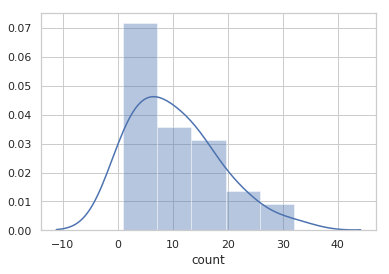

In [178]:
sns.distplot(final_A["count"])

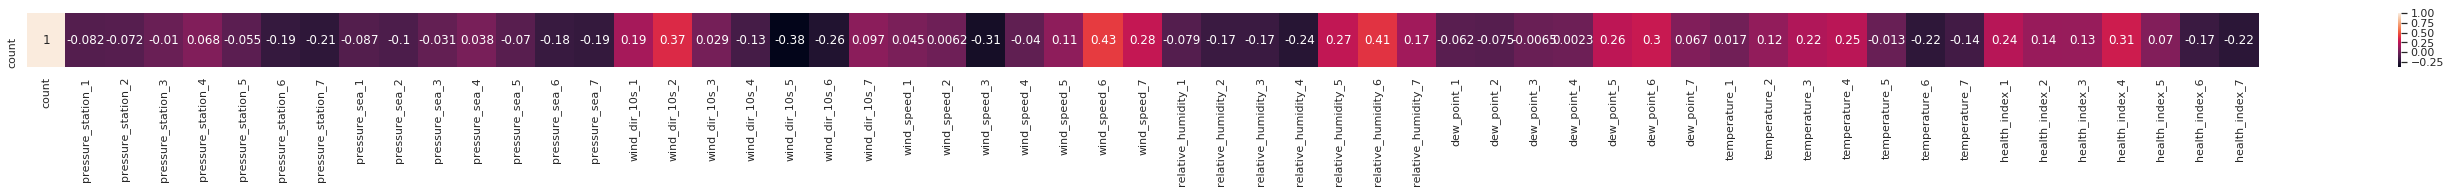

In [179]:
fig, ax = plt.subplots(figsize=(50,1))
sns.heatmap(final_A.corr().loc[['count'], :], annot=True, ax=ax)

In [180]:
final_A.tail()

,count,date,pressure_station_1,pressure_station_2,pressure_station_3,pressure_station_4,pressure_station_5,pressure_station_6,pressure_station_7,pressure_sea_1,...,temperature_5,temperature_6,temperature_7,health_index_1,health_index_2,health_index_3,health_index_4,health_index_5,health_index_6,health_index_7
31,7,2018-08-14,92.97,93.68,93.57,93.71,94.44,94.54,94.45,100.7,...,17.65,18.15,19.2,5.0,7.5,7.0,9.9,3.2,3.1,4.7
32,9,2018-08-21,93.74,92.92,93.04,93.52,93.15,93.17,93.79,101.6,...,15.80,12.30,11.4,5.4,7.3,3.9,1.0,6.4,1.7,2.0
33,1,2018-08-28,93.08,92.67,92.96,92.74,93.47,93.30,94.21,100.9,...,12.75,14.10,9.1,2.5,2.4,1.6,3.5,1.8,3.6,1.3
34,19,2018-09-04,94.35,94.40,94.24,93.31,93.30,93.74,93.12,102.4,...,15.15,9.30,8.5,2.0,2.6,2.5,3.8,1.9,1.0,1.2
35,15,2018-09-18,94.23,93.91,94.49,94.32,94.06,93.33,93.93,102.3,...,0.05,5.60,8.3,1.6,2.5,1.8,2.1,1.6,1.7,2.0


In [181]:
# final_A.groupby('trap_region_cat').mean()["count"].plot(kind='bar')
final_A[final_A['count'] == final_A['count'].max()]

,count,date,pressure_station_1,pressure_station_2,pressure_station_3,pressure_station_4,pressure_station_5,pressure_station_6,pressure_station_7,pressure_sea_1,...,temperature_5,temperature_6,temperature_7,health_index_1,health_index_2,health_index_3,health_index_4,health_index_5,health_index_6,health_index_7
30,32,2018-08-07,93.45,93.48,93.41,93.24,94.04,94.16,93.7,101.2,...,12.65,10.25,17.3,6.4,6.1,4.8,10.2,1.9,1.5,2.5


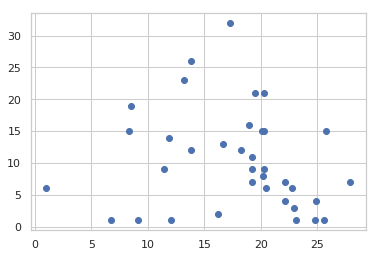

In [182]:
plt.scatter(final_A["temperature_7"], final_A["count"])
plt.show()

In [183]:
# final_A.groupby('comparison_group_cat').mean()["count"].plot(kind='bar')

In [184]:
# final_A.groupby('specific_epithet_cat').mean()["count"].plot(kind='bar')

In [185]:
# final_A.groupby('genus_cat').mean()["count"].plot(kind='bar')

In [186]:
from sklearn.preprocessing import StandardScaler

cols = ['count', 'date', 'pressure_station_1', 'pressure_station_2', 'pressure_station_3', 'pressure_station_4', 'pressure_station_5', 'pressure_station_6', 'pressure_station_7', 'pressure_sea_1', 'pressure_sea_2', 'pressure_sea_3', 'pressure_sea_4', 'pressure_sea_5', 'pressure_sea_6', 'pressure_sea_7']

X = final_A.drop(columns=cols)

y = final_A['count']

wind_speed_l = ["wind_speed_{}".format(i+1) for i in range(7)]
relative_humidity_l = ["relative_humidity_{}".format(i+1) for i in range(7)]
dew_point_l = ["dew_point_{}".format(i+1) for i in range(7)]
temperature_l = ["temperature_{}".format(i+1) for i in range(7)]
health_index_l = ["health_index_{}".format(i+1) for i in range(7)]
dew_point_l = ["dew_point_{}".format(i+1) for i in range(7)]




cols= wind_speed_l + relative_humidity_l + dew_point_l + temperature_l + health_index_l + dew_point_l
X[cols] = X[cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
X[cols] = StandardScaler().fit_transform(X[cols])


In [187]:
X.head()

,wind_dir_10s_1,wind_dir_10s_2,wind_dir_10s_3,wind_dir_10s_4,wind_dir_10s_5,wind_dir_10s_6,wind_dir_10s_7,wind_speed_1,wind_speed_2,wind_speed_3,...,temperature_5,temperature_6,temperature_7,health_index_1,health_index_2,health_index_3,health_index_4,health_index_5,health_index_6,health_index_7
0,20.0,6.0,11.0,11.0,30.0,29.0,6.0,-1.504540,0.073583,2.038306,...,-1.959478,-1.521436,-1.817209,0.090187,-0.092216,-0.020667,-0.332678,-1.320890,-0.946638,-0.296061
1,5.0,15.0,26.0,20.0,27.0,31.0,19.0,1.317522,0.190943,-0.763184,...,0.591541,0.756865,0.893407,-1.151214,-0.714677,-0.764677,-0.387615,0.216589,0.319152,0.103621
2,17.0,36.0,34.0,33.0,36.0,7.0,10.0,0.047594,1.163357,0.877689,...,0.752870,-0.067023,0.246838,-0.005305,-0.853001,-0.950679,-0.442553,-0.003051,0.124415,0.503303
3,14.0,3.0,11.0,27.0,9.0,34.0,27.0,2.466505,-0.647345,-1.783726,...,0.853701,0.353328,0.420915,0.472157,0.391919,0.165335,-0.332678,1.095149,0.221784,-0.029606
4,15.0,12.0,10.0,27.0,7.0,30.0,20.0,1.317522,1.666330,1.277902,...,-0.386518,-0.630293,0.860250,0.472157,-0.092216,0.537340,-0.717241,-0.552150,-0.849269,0.769758


In [188]:
len(X.index)

36

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [190]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [191]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [192]:
print(lin_reg.intercept_)
coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

29.519836581346624


,Coefficient
wind_dir_10s_1,0.131221
wind_dir_10s_2,0.890797
wind_dir_10s_3,0.357180
wind_dir_10s_4,-0.819999
wind_dir_10s_5,-0.473766
wind_dir_10s_6,-0.750989
wind_dir_10s_7,0.214561
wind_speed_1,3.105593
wind_speed_2,1.004113
wind_speed_3,-8.141206


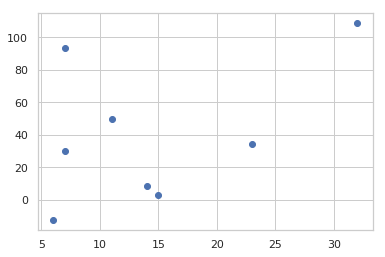

In [193]:
pred = lin_reg.predict(X_test)
plt.scatter(y_test, pred)

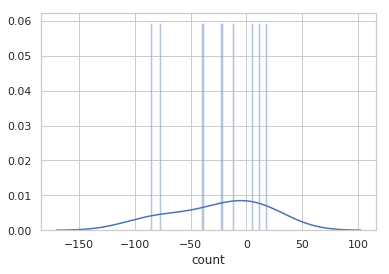

In [194]:
sns.distplot((y_test - pred), bins=50);

In [195]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 34.146411517278736
MSE: 2014.6749089374646
RMSE: 44.885130153954826
R2 Square -26.987669670500917
Train set evaluation:
_____________________________________
MAE: 2.042810365310288e-14
MSE: 6.937468189343641e-28
RMSE: 2.6339073995384956e-14
R2 Square 1.0


In [196]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,34.146412,2014.674909,44.88513,-26.98767,-27.996843
